<h1>Decision Trees (Part 1)</h1>
<p>Given a data set we can use machine learning to create decision trees to make a complex decision based on data.  In this assignment we learn decision trees to classify whether or not we should go and play tennis given the weather conditions.  We use two seperate algorithms to select which feature to branch on at each level of the tree.  Mainly, ID3 and random selection.</p>
<p>We are given the following dataset to work with.</p>
<table>
    <tr><th>No.</th><th>Outlook</th><th>Temperature</th><th>Humidity</th><th>Windy</th><th>Class</th></tr>
    <tr><td>1</td><td>sunny</td><td>hot</td><td>high</td><td>false</td><td>N</td></tr>
    <tr><td>2</td><td>sunny</td><td>hot</td> <td>high</td> <td>true</td> <td>N</td></tr>
    <tr><td>3</td><td>overcast</td><td>hot</td> <td>high</td> <td>false</td> <td>P</td></tr>
    <tr><td>4</td><td>rain</td><td>mild</td> <td>high</td> <td>false</td> <td>P</td></tr>
    <tr><td>5</td><td>rain</td><td>cool</td> <td>normal</td> <td>false</td> <td>P</td></tr>
    <tr><td>6</td><td>rain</td><td>cool</td> <td>normal</td> <td>true</td> <td>N</td></tr>
    <tr><td>7</td><td>overcast</td><td>cool</td> <td>normal</td> <td>true</td> <td>P</td></tr>
    <tr><td>8</td><td>sunny</td><td>mild</td> <td>high</td> <td>false</td> <td>N</td></tr>
    <tr><td>9</td><td>sunny</td><td>cool</td> <td>normal</td> <td>false</td> <td>P</td></tr>
    <tr><td>10</td><td>rain</td><td>mild</td> <td>normal</td> <td>false</td> <td>P</td></tr>
    <tr><td>11</td><td>sunny</td><td>mild</td> <td>normal</td> <td>true</td> <td>P</td></tr>
    <tr><td>12</td><td>overcast</td><td>mild</td> <td>high</td> <td>true</td> <td>P</td></tr>
    <tr><td>13</td><td>overcast</td><td>hot</td> <td>normal</td> <td>false</td> <td>P</td></tr>
    <tr><td>14</td><td>rain</td><td>mild</td> <td>high</td> <td>true</td> <td>N</td></tr>
</table>

<h3>Data Preprocessing</h3>
<p>Before doing anything we need to convert our data into numeric data.  To do this we can just use a dictionary that maps strings to integers and loop over our data replacing each string.  We seperate the data into X and Y where X is our input matrix and Y is the vector of labels.</p>

In [6]:
import numpy as np
import decision_tree as dt

converters = {'sunny':0, 'overcast':1, 'rain':2, 'hot':0, 'mild':1,'cool':2, 'high':0, 'normal':1, 'true':1, 'false':0, 'N':0, 'P':1}

data = [['sunny', 'hot', 'high', 'false', 'N'],
        ['sunny', 'hot', 'high', 'true', 'N'],
        ['overcast', 'hot', 'high', 'false', 'P'],
        ['rain', 'mild', 'high', 'false', 'P'],
        ['rain', 'cool', 'normal', 'false', 'P'],
        ['rain', 'cool', 'normal', 'true', 'N'],
        ['overcast', 'cool', 'normal', 'true', 'P'],
        ['sunny', 'mild', 'high', 'false', 'N'],
        ['sunny', 'cool', 'normal', 'false', 'P'],
        ['rain', 'mild', 'normal', 'false', 'P'],
        ['sunny', 'mild', 'normal', 'true', 'P'],
        ['overcast', 'mild', 'high', 'true', 'P'],
        ['overcast', 'hot', 'normal', 'false', 'P'],
        ['rain', 'mild', 'high', 'true', 'N']]

np_data = np.zeros((len(data), len(data[0])))

# convert the data into numbers...
for i, row in enumerate(data):
    for k, col in enumerate(row):
        np_data[i,k] = converter[col]
        
X = np_data[:,:-1]
Y = np_data[:,-1]

<h2>Training - ID3</h2>
<p>We can use sklearn to train the model using the DecisionTreeClassifier with ID3 as the splitter.
We select ID3 by marking the splitter as 'best'.</p>

<p>In the displayed graph below we see that the leaves that are colored orange are the negative instances of our data, and the leaves that are colored blue are the positive instances.  We start by splitting on the third feature (x2) and get an even split of 50%.  In our case recall that feature 2 was the humidity.  All of the samples that were false in the first node or those samples where the humidty was high, and all the samples that were ture in the first node are the samples where the humidty was normal. The splitting continues on until all of the data samples are classified correctly.</p>

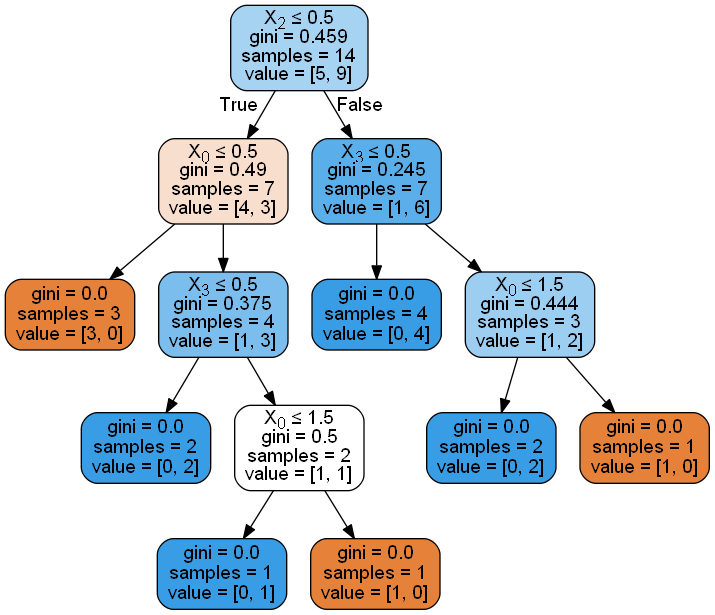

In [8]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

clf = tree.DecisionTreeClassifier(splitter='best')
clf = clf.fit(X,Y)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

<h2>Training - Random</h2>
<p>We can select a different splitter to train our model.  This time lets use the random splitter and observe the results.  Not quite as clean...</p>

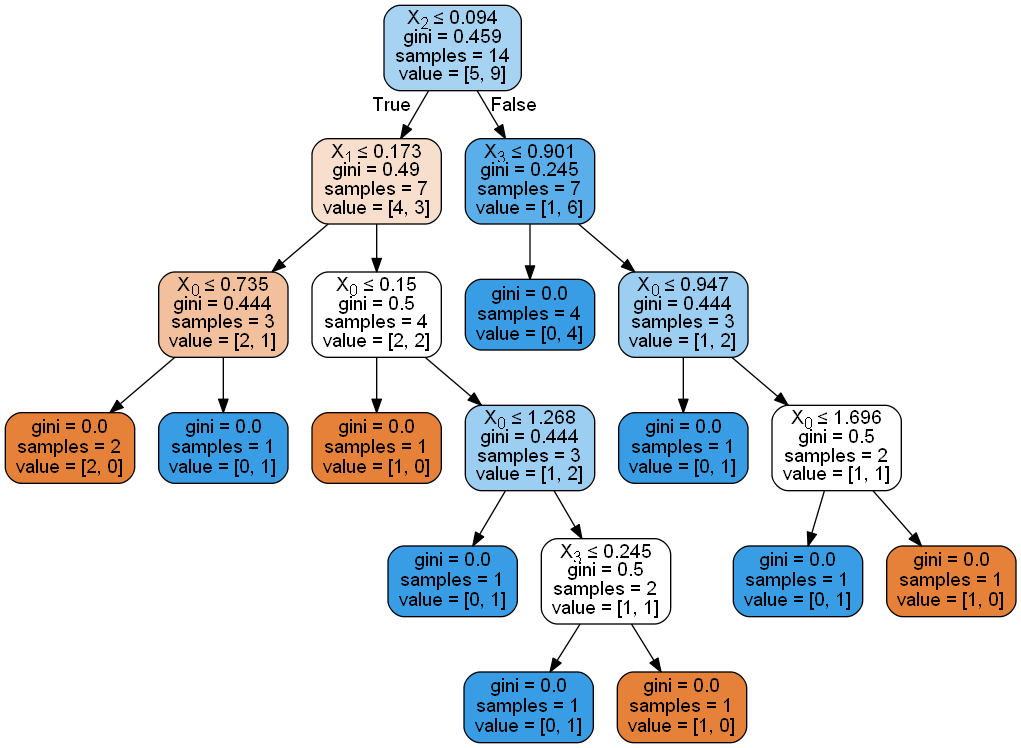

In [12]:
clf = tree.DecisionTreeClassifier(splitter='random')
clf = clf.fit(X,Y)
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())